In [ ]:
using Distributed
addprocs(10)
using MAT
using NPZ
using PyPlot
using SharedArrays
@everywhere using Eirene
@everywhere using DelimitedFiles

In [2]:
pol_vals = range(0.005, stop=0.025, length=11);
adh_vals = range(0.05, stop=0.25, length=11);

In [3]:
macro bash_str(s) open(`bash`,"w",stdout) do io; print(io, s); end; end

@bash_str (macro with 1 method)

#### Compute Pairwise Distances (H0+H1) with proliferation off

In [4]:
bash"""
date
"""

Thu Dec 24 13:47:56 EST 2020


In [ ]:
wasserstein_distances = SharedArray{Float64}(121, 121);

@async @distributed for i=1:121 for j=1:i
        
        linear_to_mat_idx = function(lin_idx)
            adh_val = div(lin_idx, 11) + 1;
            pol_val = lin_idx % 11;
            if pol_val == 0
                pol_val = 11; 
                adh_val -= 1;
            end
            return (adh_val, pol_val);
        end
        
        # set adh_1, pol_1
        (adh_1, pol_1) = linear_to_mat_idx(i);
        
        # set adh_2, pol_2
        (adh_2, pol_2) = linear_to_mat_idx(j);
        
        adh_pol_sweep_folder = "adhesion_polarity_sweep";
        
        subfolder = string(adh_1) * "_adh_" * string(pol_1) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions_1 = transpose(hcat(posx, posy));
        pers_diag_1 = eirene(positions_1, model="pc", maxdim=1);
        barcodedata_1_d0 = barcode(pers_diag_1, dim=0);
        barcodedata_1_d1 = barcode(pers_diag_1, dim=1);
        barcodedata_1 = vcat(barcodedata_1_d0, barcodedata_1_d1)
                
        subfolder = string(adh_2) * "_adh_" * string(pol_2) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions_2 = transpose(hcat(posx, posy));  
        pers_diag_2 = eirene(positions_2, model="pc", maxdim=1);
        barcodedata_2_d0 = barcode(pers_diag_2, dim=0);
        barcodedata_2_d1 = barcode(pers_diag_2, dim=1);
        barcodedata_2 = vcat(barcodedata_2_d0, barcodedata_2_d1)
        
        wasserstein_distances[i, j] = wasserstein_distance(barcodedata_1, barcodedata_2, q=2, p=2);
        wasserstein_distances[j, i] = wasserstein_distances[i, j];
        
    end
end

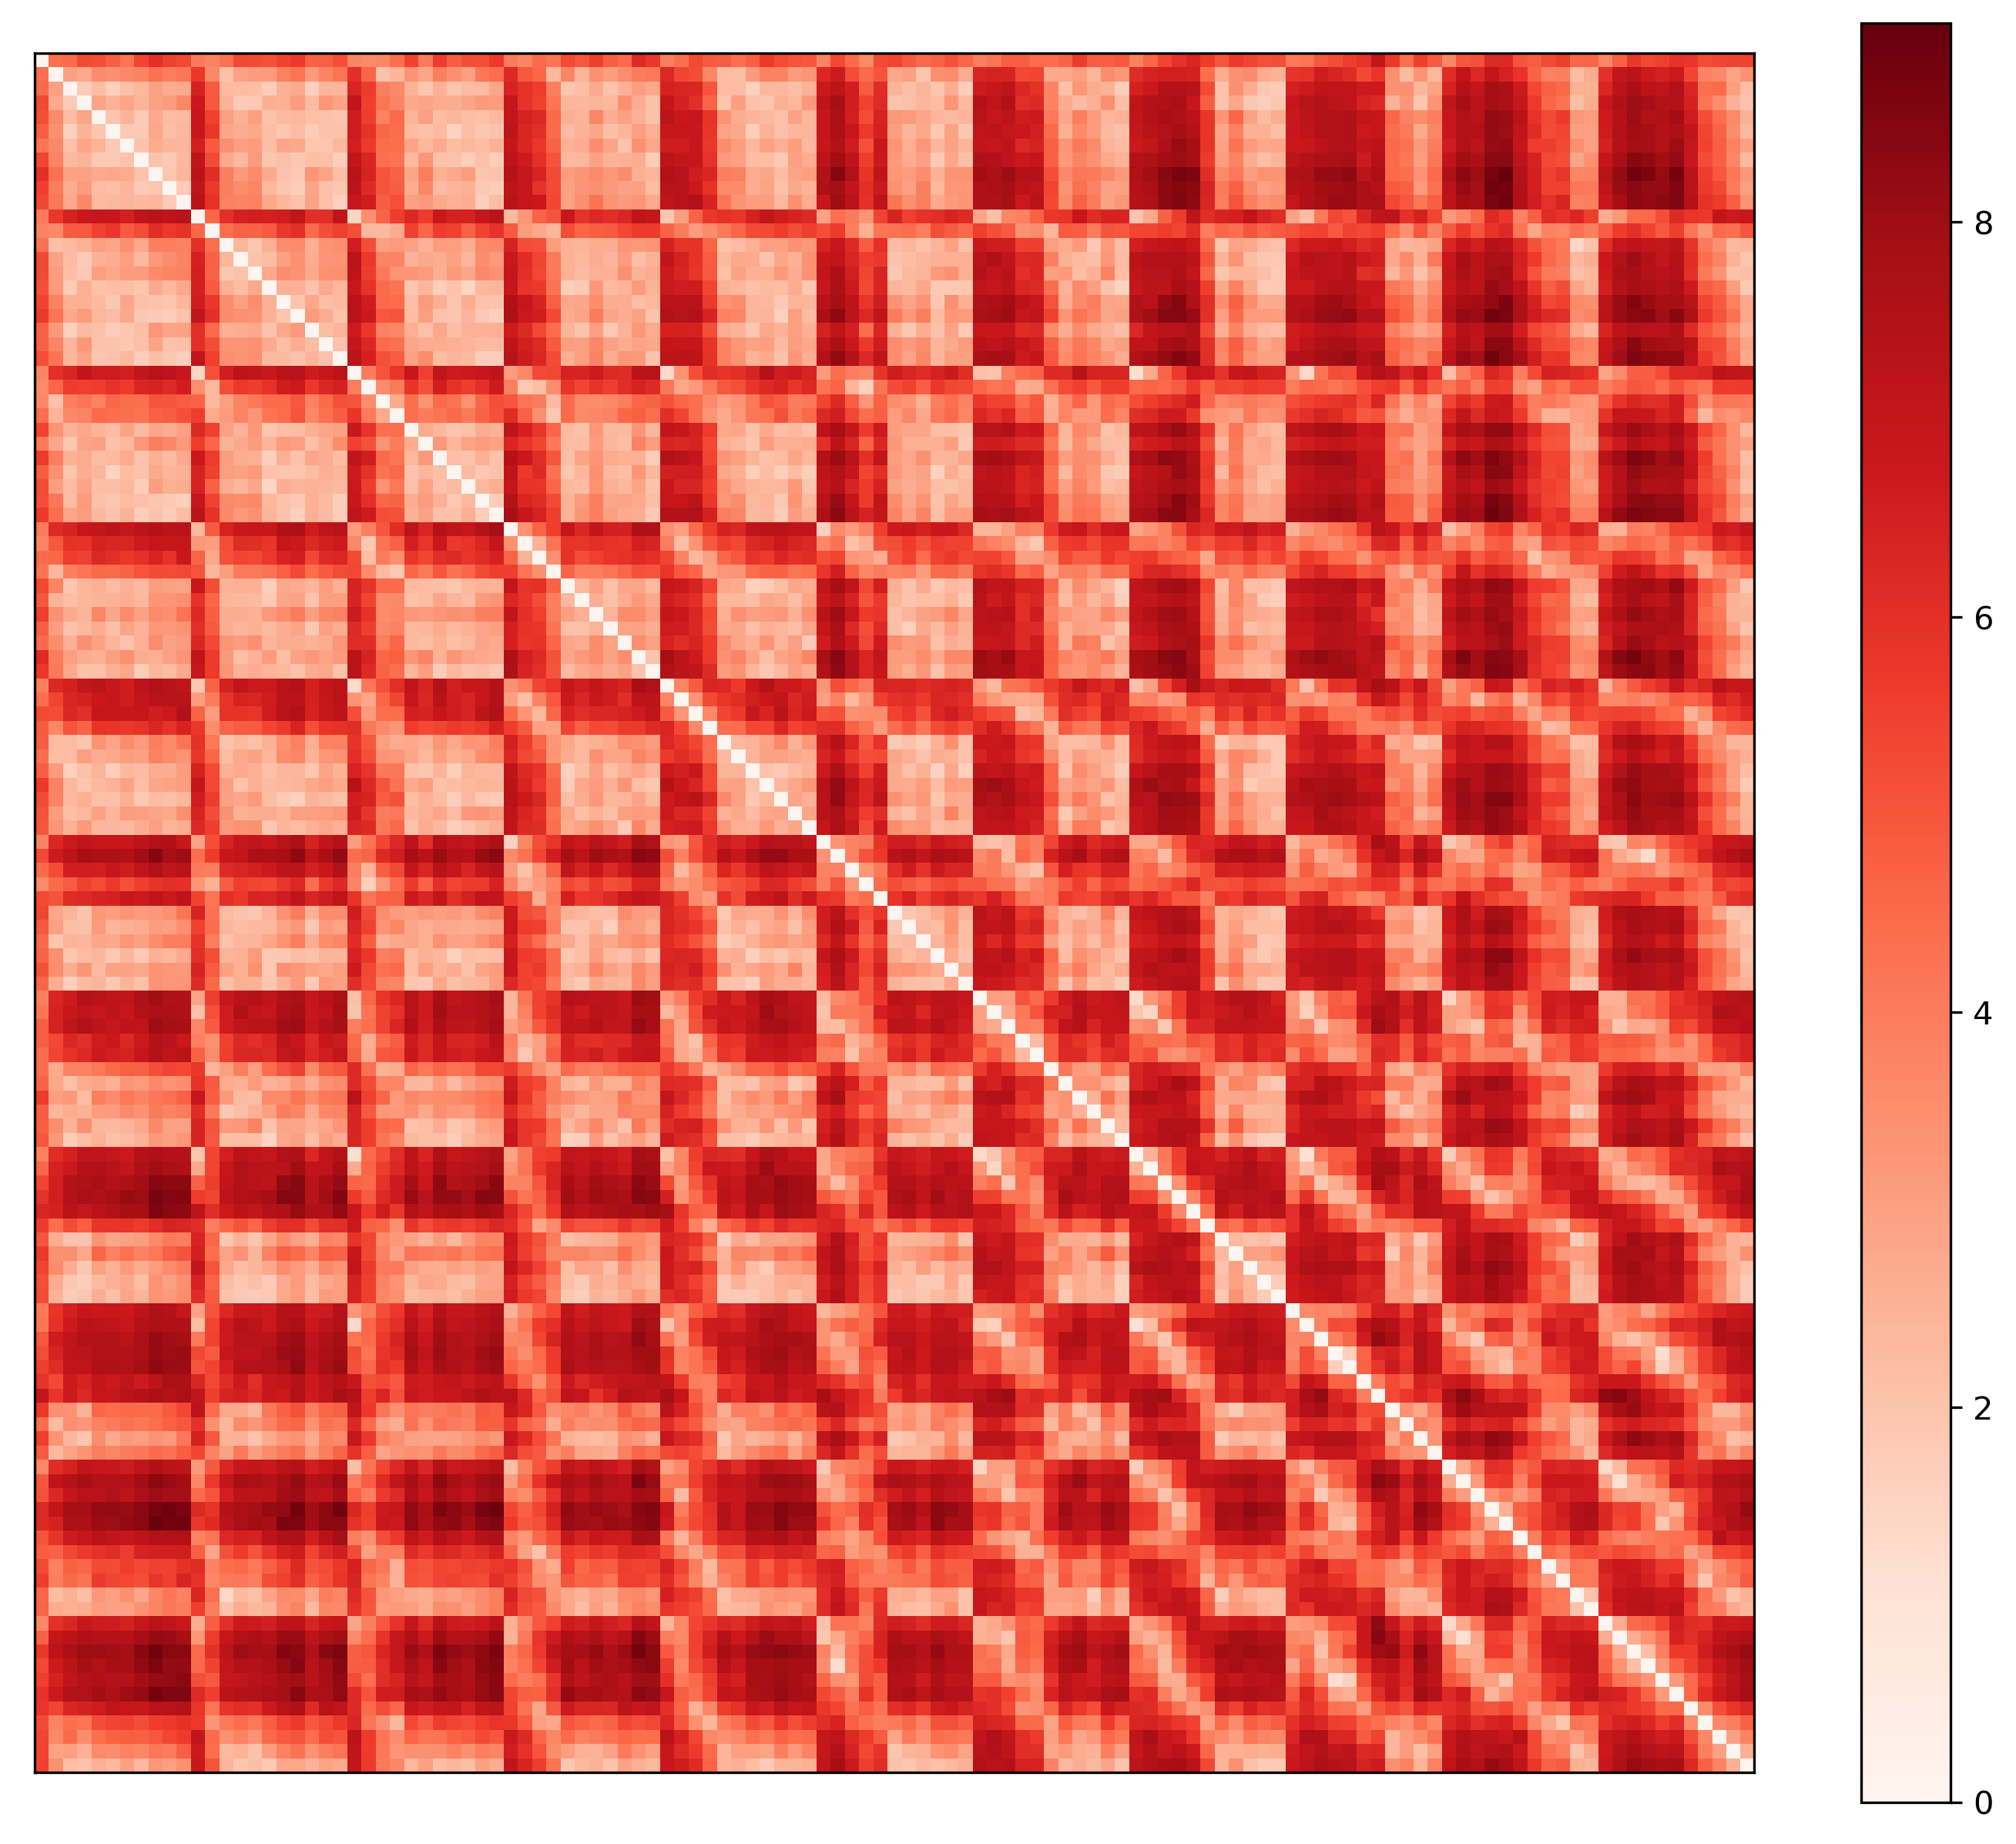

PyObject <matplotlib.colorbar.Colorbar object at 0x7f18dcde2d00>

In [12]:
figure(figsize=(12,10), dpi=300)
imshow(wasserstein_distances, cmap="Reds", interpolation="none")
xticks([])
yticks([])
colorbar()

In [13]:
npzwrite("pairwise_wass_H0p1.npy", wasserstein_distances)

In [14]:
bash"""
date
"""

Thu Dec 24 14:10:06 EST 2020


#### Compute Pairwise Distances (H0+H1) with proliferation on

In [15]:
bash"""
date
"""

Thu Dec 24 14:11:21 EST 2020


In [ ]:
wasserstein_distances_prof = SharedArray{Float64}(121, 121);

@async @distributed for i=1:121 for j=1:i
        
        linear_to_mat_idx = function(lin_idx)
            adh_val = div(lin_idx, 11) + 1;
            pol_val = lin_idx % 11;
            if pol_val == 0
                pol_val = 11; 
                adh_val -= 1;
            end
            return (adh_val, pol_val);
        end
        
        # set adh_1, pol_1
        (adh_1, pol_1) = linear_to_mat_idx(i);
        
        # set adh_2, pol_2
        (adh_2, pol_2) = linear_to_mat_idx(j);
        
        adh_pol_sweep_folder = "adhesion_polarity_proliferation_sweep";
        
        subfolder = string(adh_1) * "_adh_" * string(pol_1) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions_1 = transpose(hcat(posx, posy));
        pers_diag_1 = eirene(positions_1, model="pc", maxdim=1);
        barcodedata_1_d0 = barcode(pers_diag_1, dim=0);
        barcodedata_1_d1 = barcode(pers_diag_1, dim=1);
        barcodedata_1 = vcat(barcodedata_1_d0, barcodedata_1_d1)
                
        subfolder = string(adh_2) * "_adh_" * string(pol_2) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions_2 = transpose(hcat(posx, posy));  
        pers_diag_2 = eirene(positions_2, model="pc", maxdim=1);
        barcodedata_2_d0 = barcode(pers_diag_2, dim=0);
        barcodedata_2_d1 = barcode(pers_diag_2, dim=1);
        barcodedata_2 = vcat(barcodedata_2_d0, barcodedata_2_d1)
        
        wasserstein_distances_prof[i, j] = wasserstein_distance(barcodedata_1, barcodedata_2, q=2, p=2);
        wasserstein_distances_prof[j, i] = wasserstein_distances_prof[i, j];
        
    end
end

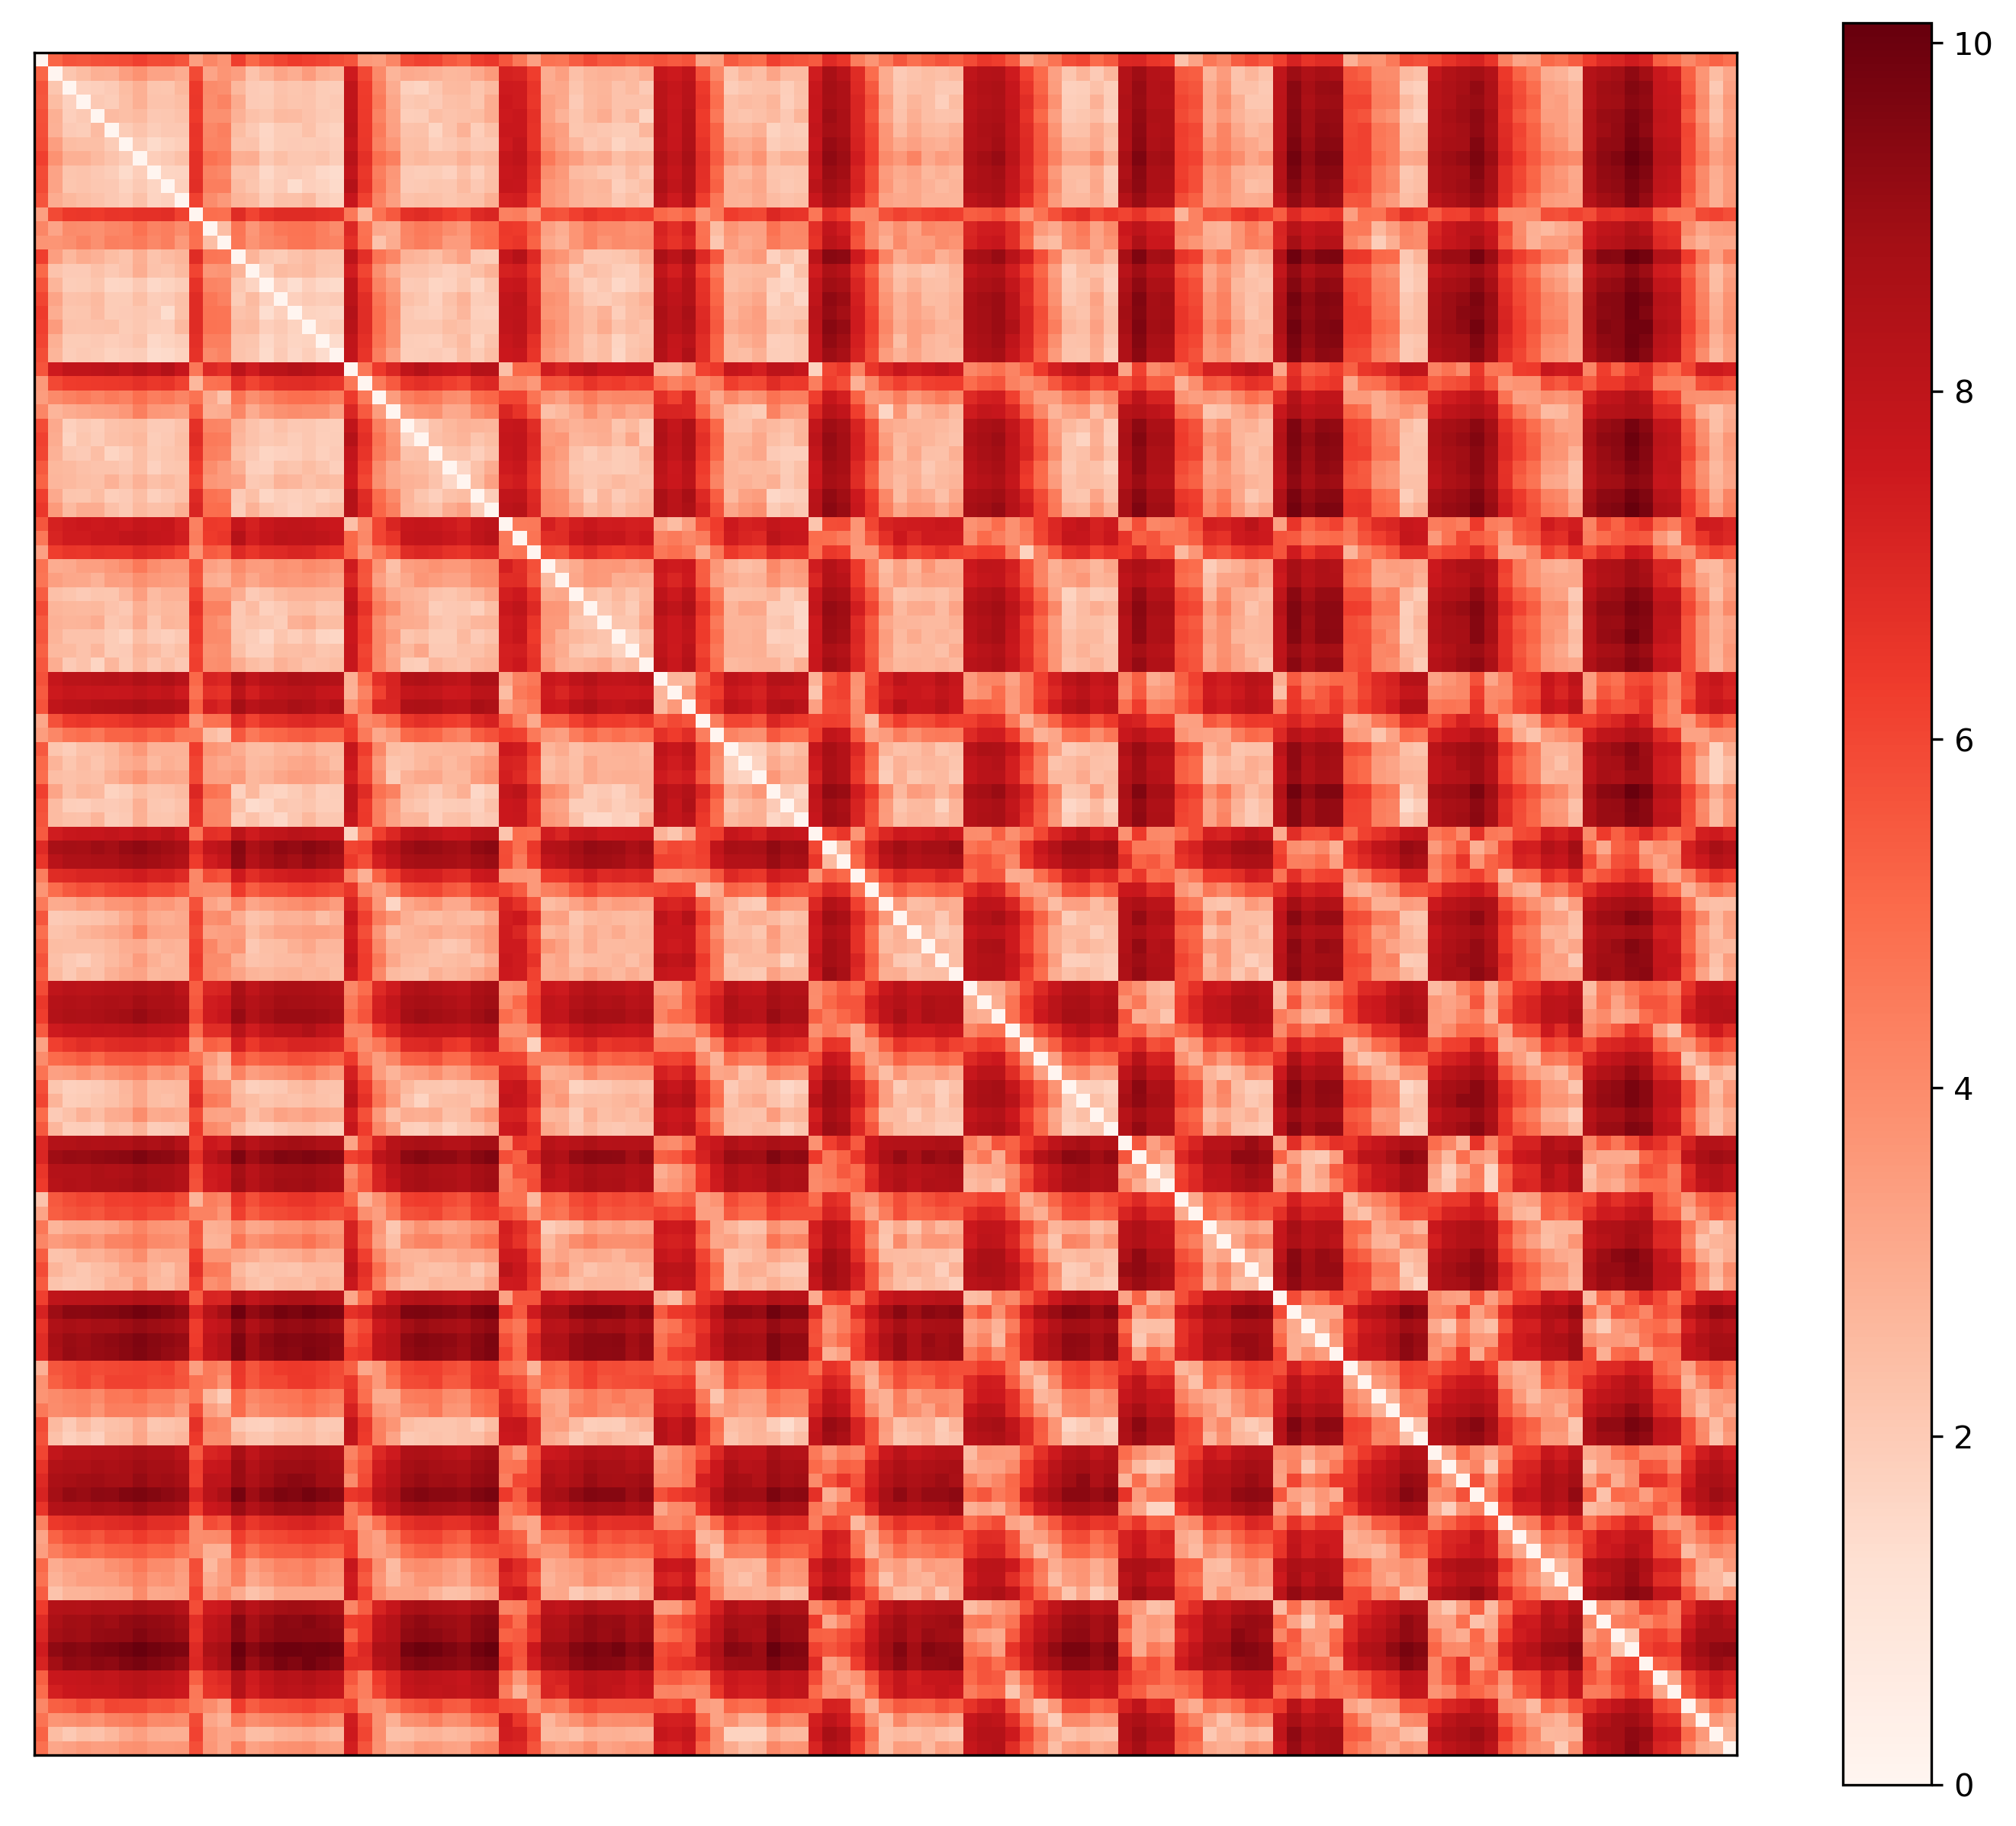

PyObject <matplotlib.colorbar.Colorbar object at 0x7f18dc6db610>

In [32]:
figure(figsize=(12,10), dpi=300)
imshow(wasserstein_distances_prof, cmap="Reds", interpolation="none")
xticks([])
yticks([])
colorbar()

In [33]:
npzwrite("pairwise_wass_prolif_H0p1.npy", wasserstein_distances_prof)

In [34]:
bash"""
date
"""

Thu Dec 24 15:27:54 EST 2020
